# Устройство нейрона
Нейрон условно можно разделить на три части: **тело** нейрона, и его отростки - **дендриты** и **аксон**.
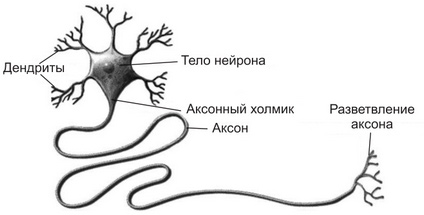

**Дендриты** - ветви нейрона, создающие дендритное дерево, на котором располагаются контакты с другими нейронами. Они являются входными каналами нервной клетки, через которые нейрон получает сигналы от других нейронов.

**Тело нейрона** - часть нейрона, где объединяются и обрабатываются все сигналы, поступившие через дендриты. Здесь принимается решение о передаче сигнала далее и о его силе.

**Аксон** - выходной интерфейс нейрона, который соединяется с дендритом другого нейрона через синапсы. По аксону проходит сигнал, исходящий из тела нейрона, и передается следующей клетке нейронной сети.

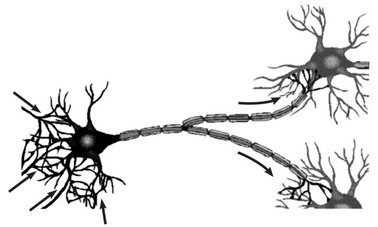

# Перцептрон

**Перцептрон** — это простейшая форма искусственной нейронной сети. Он состоит из одного или нескольких нейронов, принимающих входные данные (сенсоры), умножающих их на соответствующие веса, и применяющих активационную функцию к их сумме.
Перцептроны обычно применяются для бинарной классификации задач, но могут быть расширены для решения более сложных задач.

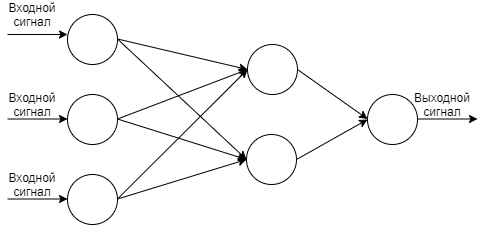

**Функция активации** - это математическая функция, которая применяется к выходу нейрона, она определяет, должен ли нейрон активироваться и передавать сигнал дальше или оставаться неактивным.

**Вес** - это параметр, который отвечает за важность входных данных, каждый входной сигнал, попадающий на нейрон, умножается на соответствующий ему весовой коэффициент, веса определяются в процессе обучения.

**Обучение нейронной сети** - это процесс подбора входных весов для каждого нейрона таким образом, чтобы на выходе получить сигнал максимально соответствующий ожиданиям.

## Обучение с учителем
Обучение нейронных сетей с учителем основано на подаче сети входных данных с известными правильными ответами, сравнении полученных результатов с ожидаемыми, подсчете ошибки и коррекции весов нейронов для минимизации этой ошибки. Повторение этого процесса на большом количестве данных помогает сети понять, какие сигналы важны для определения правильного результата.Чем больше и разнообразнее данные для обучения, тем эффективнее обучение нейросети.


# Пример расчета
Функция активации сигмоида: **σ (x) = 1 / (1 + e^-x)**
Она существует на отрезке от минус бесконечности до бесконечности, плавно меняется от 0 до 1 и имеет значение 0,5 в точке 0.
Функция передает 1 если значение > 0.5 и 0, если меньше.

Как пример на входе: **1, 0, 1**

При случайно выбраных весах: **0,43, 0,18, -0,21** cумма входных значений первого нейрона скрытого слоя: **1 * 0,43 + 0 * 0,18 + 1 * -0,21 = 0,22**

Прогоним через функцию активации: **sigmoid(0,22) = 1 / (1 + e^-0,22) = 0,55**. То же самое проделаем и для второго нейрона скрытого слоя и получим **0,60**

Далее вычисляем значение для вызодного нейрона: **0,55 * 0,22 + 0,6 * 0, 47 = 0,4** затем **sigmoid(0,4) = 1 / (1 + e^-0,4) = 0,6**

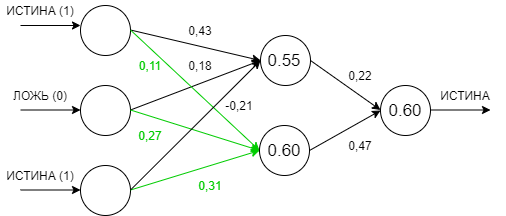

Для обучения сети нужно понимать насколько сеть была близко к результату, для этого вычисляют ошибку выходного нейрона, это разница между полученным значением и ожидаемым: **errorout = 0.60 - 0 = 0.60**

Ошибка каждого не выходного нейрона расчитывается уже по дургой формуле, новый вес умножаем на дельту: **error = new_weight - delta = 0.60**

Затем вычисляем значение по формуле величину на сколько нужно поменять веса: **sigmoid(x)dx = sigmoid(x) - (1 - sigmoid(x))**, значит
**delta = 0.60 * (1 - 0.60) = 0.24**

Новый вес для входа нейрона рассчитывается по формуле: **weight = weight - output * delta * learning rate**,
где **weight** - текущий вес, **output** - значение на выходе предыдущего нейрона, **delta** - дельта весов, которую мы рассчитали ранее и **learning rate** - значение, подбираемое экспериментально, от которого зависит скорость обучения нейросети, возьмем как **0,3**.

Расчитаем вес для первого нейрона: **w1 = 0,22 - 0,55 * 0,24 * 0,3 = 0,18**, также и для второго: **w2 = 0,47 - 0,6 * 0,24 * 0,3 = 0,43**

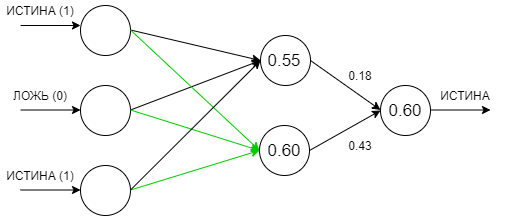


# Пример реализации перцептрона

In [71]:
import math
import random

class Input:
    def __init__(self, neuron, weight):
        self.neuron = neuron
        self.weight = weight

class Neuron:
    def __init__(self, layer, previous_layer):
        self._layer = layer
        self.inputs = [Input(neuron, random.random() - 0.5) for neuron in previous_layer.neurons] if previous_layer else [0]

    @property
    def is_first_layer_neuron(self):
        return not isinstance(self.inputs[0], Input)

    @property
    def input_sum(self):
        return sum(input.neuron.value * input.weight for input in self.inputs)

    @property
    def value(self):
        return self.inputs[0] if self.is_first_layer_neuron else self._layer._network.activation_function(self.input_sum)

    @value.setter
    def value(self, val):
        if not self.is_first_layer_neuron:
            return
        self.inputs[0] = val

    @value.setter
    def error(self, error):
        if self.is_first_layer_neuron:
            return
        w_delta = error * self._layer._network.derivative_function(self.input_sum)
        for input in self.inputs:
            input.weight -= input.neuron.value * w_delta * self._layer._network.learning_rate
            input.neuron.error = input.weight * w_delta

class Layer:
    def __init__(self, neurons_count, previous_layer, network):
        self._network = network
        self.neurons = [Neuron(self, previous_layer) for _ in range(neurons_count)]

    @property
    def is_first_layer(self):
        return self.neurons[0].is_first_layer_neuron

    @is_first_layer.setter
    def input(self, val):
        if not self.is_first_layer or not isinstance(val, list) or len(val) != len(self.neurons):
            return
        for v, neuron in zip(val, self.neurons):
            neuron.value = v

class Network:
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + math.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        sig = Network.sigmoid(x)
        return sig * (1 - sig)

    def __init__(self, input_size, output_size, hidden_layers_count=1, learning_rate=0.5):
        self.activation_function = Network.sigmoid
        self.derivative_function = Network.sigmoid_derivative
        self.learning_rate = learning_rate
        self.layers = [Layer(input_size, None, self)]
        
        for _ in range(hidden_layers_count):
            layer_size = min(input_size * 2 - 1, int(input_size * 2 / 3 + output_size))
            self.layers.append(Layer(layer_size, self.layers[-1], self))

        self.layers.append(Layer(output_size, self.layers[-1], self))

    def set_input(self, input_data):
        self.layers[0].input = input_data

    @property
    def prediction(self):
        return [neuron.value for neuron in self.layers[-1].neurons]

    def train_once(self, data_set):
        if not isinstance(data_set, list):
            return

        for data_case in data_set:
            input_data, expected = data_case
            self.set_input(input_data)

            for i, r in enumerate(self.prediction):
                self.layers[-1].neurons[i].error = r - expected[i]

    def train(self, data_set, epochs=100000):
        for _ in range(epochs):
            self.train_once(data_set)

In [72]:
network = Network(2, 1)

In [73]:
data = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0]),
]
network.train(data)

In [74]:
test_data = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

for input in test_data:
    network.input = input
    print(f"{input[0]} XOR {input[1]} = {network.prediction}")

0 XOR 0 = [0.37182553417377423]
0 XOR 1 = [0.37182553417377423]
1 XOR 0 = [0.37182553417377423]
1 XOR 1 = [0.37182553417377423]
